<a href="https://colab.research.google.com/github/hwanin99/ComputerVision_Seminar/blob/main/Week4_%EC%88%98%EC%97%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pwd

'/content'

In [3]:
%cd /content/drive/MyDrive/CV_seminar_project

/content/drive/MyDrive/CV_seminar_project


In [4]:
import torch
import torchvision
from torchvision import transforms # 이미지 데이터 augmentation
import os
import glob

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(42)
if device == 'cuda':
  torch.cuda.manual_seed_all(42)

In [5]:
device

'cpu'

In [6]:
train_path = '/content/drive/MyDrive/CV_seminar_project/train'
test_path = '/content/drive/MyDrive/CV_seminar_project/test'

dolphin_dir='/dolphin'
shark_dir='/shark'
whale_dir='/whale'

# pytorch 데이터셋 클래스 실습1

## 1. 라이브러리를 이용하기
이미지 전처리하기
1. resize하기 -> 224,224(H,W)
2. tensor화 하기 -> 픽셀 값을 0~1로 바꾸기기

In [7]:
preprop_imgs=transforms.Compose(
    [transforms.Resize((224,224)),
     transforms.ToTensor()
     ]
)

preprop_train=torchvision.datasets.ImageFolder(root=train_path,transform=preprop_imgs)
preprop_test=torchvision.datasets.ImageFolder(root=test_path,transform=preprop_imgs)

Image Augmentatino - 1

>Normalize (X-Mean)/std -> 여러개가 이용가능한데
> 1. ImageNet 데이터셋의 Mean, std를 이용한다.
> 2. 지금 내가 가지고 있는 데이터셋의 통계값을 이용한다.(train)

In [8]:
Aug_imgs=transforms.Compose(
    [transforms.Resize((224,224)),
     transforms.RandomCrop(180),
     transforms.ColorJitter(brightness=0.2,contrast=0.2,saturation=0.2,hue=0.2),
     transforms.RandomHorizontalFlip(p=0.5),
     transforms.RandomVerticalFlip(p=0.5),
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])
     ]
)

Aug_train=torchvision.datasets.ImageFolder(root=train_path,transform=Aug_imgs)
Aug_test=torchvision.datasets.ImageFolder(root=test_path,transform=preprop_imgs)

In [9]:
train_loader=torch.utils.data.DataLoader(Aug_train,batch_size=4,
                                    shuffle=True,
                                    num_workers=0)
test_loader=torch.utils.data.DataLoader(Aug_test,batch_size=4,
                                    shuffle=True,
                                    num_workers=0)

In [10]:
for data,label in train_loader:
  break

In [11]:
label

tensor([0, 2, 1, 2])

In [12]:
data.shape #(B,C,H,W)

torch.Size([4, 3, 180, 180])

# pytorch 데이터셋 클래스 실습2

## 1. 파이토치 데이터 셋 클래스를 직접 만들어보자.

1. init 생성자가 필요함.
2. getitem 필요함 -> 데이터를 읽는 역할.(인덱스 부여, iterable)
3. len 필요함. -> 데이터 개수를 알려주는 역할.


In [13]:
import torch
import torchvision
from torchvision import transforms # 이미지 데이터 augmentation
import os
import glob
from torch.utils.data import Dataset, DataLoader
import cv2
import os 

class Custom_dataset(Dataset):
  def __init__(self, root_path, mode, transforms):
    self.all_data = sorted( glob.glob( os.path.join(root_path, mode, '*', '*') ) ) # 전체 경로
    self.transforms = transforms

  def __getitem__(self, index):
    if torch.is_tensor(index): # 인덱스가 tensor형태일 수 있는 것을 방지
      index = index.tolist()

    data_path = self.all_data[index] # 인덱스가 부여된 데이터 1개
    image = cv2.imread(data_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # cv2 라이브러리의 BGR 형식을 RGB로 permute

    # transfrom 적용
    if self.transforms is not None:
      augmentation = self.transforms(image = image)
      image = augmentation['image']

    # 이미지의 이름을 이용하여, label 부여하기
    if 'dolphin' in data_path:
      label = 0
    elif 'shark' in data_path:
      label = 1
    else:
      label = 2

    return image, label

  def __len__(self):
    length = len(self.all_data)
    return length

In [14]:
root_path = '/content/drive/MyDrive/CV_seminar_project'
train_path = '/content/drive/MyDrive/CV_seminar_project/train'
test_path = '/content/drive/MyDrive/CV_seminar_project/test'

dolphin_dir='/dolphin'
shark_dir='/shark'
whale_dir='/whale'

pytorch_dataset=Custom_dataset(root_path=root_path,mode='train',transforms=None)

train_loader = DataLoader(pytorch_dataset, batch_size=1, shuffle = None, num_workers=0)

for data,label in train_loader:
  break

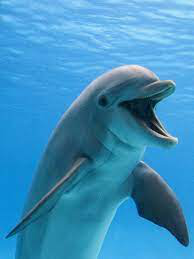

In [15]:
from PIL import Image as PILImage
PILImage.open(pytorch_dataset.all_data[0])

In [16]:
pytorch_dataset[0][1]

0

In [17]:
data

tensor([[[[ 76, 158, 205],
          [ 84, 166, 213],
          [ 92, 174, 221],
          ...,
          [162, 214, 235],
          [172, 222, 245],
          [172, 222, 247]],

         [[ 91, 173, 221],
          [ 98, 182, 228],
          [108, 190, 238],
          ...,
          [170, 222, 244],
          [165, 217, 241],
          [165, 216, 243]],

         [[ 96, 179, 229],
          [102, 188, 235],
          [113, 196, 246],
          ...,
          [175, 229, 253],
          [164, 218, 246],
          [164, 217, 248]],

         ...,

         [[ 47, 164, 231],
          [ 47, 164, 231],
          [ 45, 164, 230],
          ...,
          [ 68, 174, 232],
          [ 69, 172, 230],
          [ 69, 173, 228]],

         [[ 49, 164, 231],
          [ 47, 164, 231],
          [ 46, 163, 230],
          ...,
          [ 69, 174, 231],
          [ 71, 171, 230],
          [ 71, 172, 228]],

         [[ 49, 164, 231],
          [ 47, 164, 231],
          [ 46, 163, 230],
         

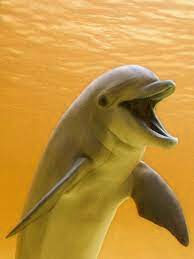

In [18]:
from google.colab.patches import cv2_imshow
import numpy as np

cv2_imshow(pytorch_dataset[0][0])

In [21]:
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2 # albumentations 텐서화 함수

train_transforms = A.Compose([
    A.Resize(224,224), # 이미지 리사이즈
    A.OneOf([
      A.HorizontalFlip(p=0.8), 
      A.VerticalFlip(p=0.8),
      A.RandomRotate90(p=0.8),
    ],p=1),

    A.OneOf([
      A.MotionBlur(p=0.8),
      A.OpticalDistortion(p=.8),
      A.GaussNoise(p=0.8),
    ],p=1),
]
)

pytorch_dataset=Custom_dataset(root_path=root_path,mode='train',transforms=train_transforms)

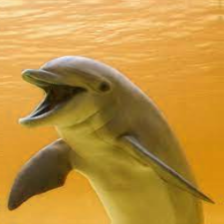

In [27]:
cv2_imshow(pytorch_dataset[0][0])